In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("2022_Flights.csv")    # read csv file - loading data set
df.head()

,Unnamed: 0,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,OriginCityName,DestCityName,DepDelay,ArrDelay,Cancelled,Diverted,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,1,1,6,4,2022-01-06,DL,"Fort Lauderdale, FL","New York, NY",NaN,NaN,1.0,0.0,NaN,1076.0,NaN,NaN,NaN,NaN,NaN
1,1,1,1,6,4,2022-01-06,DL,"Atlanta, GA","Fort Lauderdale, FL",-4.0,-1.0,0.0,0.0,93.0,581.0,NaN,NaN,NaN,NaN,NaN
2,2,1,1,6,4,2022-01-06,DL,"Fort Lauderdale, FL","Atlanta, GA",-2.0,-12.0,0.0,0.0,83.0,581.0,NaN,NaN,NaN,NaN,NaN
3,3,1,1,6,4,2022-01-06,DL,"Fort Lauderdale, FL","Raleigh/Durham, NC",-5.0,-15.0,0.0,0.0,93.0,680.0,NaN,NaN,NaN,NaN,NaN
4,4,1,1,6,4,2022-01-06,DL,"Atlanta, GA","Jackson/Vicksburg, MS",-4.0,-11.0,0.0,0.0,60.0,341.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df.shape

(7013508, 19)

In [6]:
df.size

133256652

In [7]:
df.dtypes

Quarter                        int64
Month                          int64
DayofMonth                     int64
DayOfWeek                      int64
FlightDate                    object
Marketing_Airline_Network     object
OriginCityName                object
DestCityName                  object
DepDelay                     float64
ArrDelay                     float64
Cancelled                    float64
Diverted                     float64
AirTime                      float64
Distance                     float64
CarrierDelay                 float64
WeatherDelay                 float64
NASDelay                     float64
SecurityDelay                float64
LateAircraftDelay            float64
dtype: object

In [8]:
df.info()    # getting information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7013508 entries, 0 to 7013507
Data columns (total 19 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Quarter                    int64  
 1   Month                      int64  
 2   DayofMonth                 int64  
 3   DayOfWeek                  int64  
 4   FlightDate                 object 
 5   Marketing_Airline_Network  object 
 6   OriginCityName             object 
 7   DestCityName               object 
 8   DepDelay                   float64
 9   ArrDelay                   float64
 10  Cancelled                  float64
 11  Diverted                   float64
 12  AirTime                    float64
 13  Distance                   float64
 14  CarrierDelay               float64
 15  WeatherDelay               float64
 16  NASDelay                   float64
 17  SecurityDelay              float64
 18  LateAircraftDelay          float64
dtypes: float64(11), int64(4), object(4)
memory

In [9]:
df.columns

Index(['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Marketing_Airline_Network', 'OriginCityName', 'DestCityName',
       'DepDelay', 'ArrDelay', 'Cancelled', 'Diverted', 'AirTime', 'Distance',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'],
      dtype='object')

Colums and Their Descriptions

Quarter     :  Quarter (1-4) 

Month       :  Month

DayofMonth  :  Day of Month

DayOfWeek   :  Day of Week


FlightDate  :  Date of the Flight

Marketing_Airline_Network  :  Airline Identifier

OriginCityName  :  Origin Airport, City Name

DestCityName     :  Destination Airport, City Name

DepDelay         :  Difference in minutes between scheduled and actual departure time. Early departures show negative numbers

ArrDelay         :   Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers

Cancelled        :   Cancelled Flight (1=Yes)

Diverted         :   Diverted Flight (1=Yes)

AirTime          :   Flight Time, in Minutes

Distance         :    Distance between airports (miles) 

CarrierDelay     :   Delay caused by the airline in minutes

WeatherDelay     :   Delay caused by weather

NASDelay         :   Delay caused by air system

SecurityDelay    :   Delay caused by security reasons

LateAircraftDelay :   Delay caused as a result of another flight on the same aircraft delayed

In [10]:
df.rename(columns ={"Marketing_Airline_Network":"Airlines"}, inplace=True)

In [11]:
df.Airlines.unique()

array(['DL', 'F9', 'G4', 'HA', 'AA', 'NK', 'AS', 'WN', 'UA', 'B6'],
      dtype=object)

I will change the names of airlines to the extended names of them. I find out the extended names from wikipedia.

In [12]:
df['Airlines'].replace({
    'DL':'Delta Airlines',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'AA':'American Airlines',
    'NK':'Spirit Airlines',
    'AS':'Alaska Airlines',
    'WN':'Southwest Airlines',    
    'UA':'United Airlines',
    'B6':'JetBlue Airways',
}, inplace=True)

In [13]:
df.Airlines.unique()

array(['Delta Airlines', 'Frontier Airlines', 'Allegiant Air',
       'Hawaiian Airlines', 'American Airlines', 'Spirit Airlines',
       'Alaska Airlines', 'Southwest Airlines', 'United Airlines',
       'JetBlue Airways'], dtype=object)

In [14]:
df.Airlines.value_counts()

American Airlines     1759257
Delta Airlines        1448920
Southwest Airlines    1307149
United Airlines       1263956
Alaska Airlines        382544
JetBlue Airways        273058
Spirit Airlines        232400
Frontier Airlines      155482
Allegiant Air          116877
Hawaiian Airlines       73865
Name: Airlines, dtype: int64

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quarter,7013508.0,2.516275,1.106200,1.0,2.0,3.0,3.0,4.0
Month,7013508.0,6.547852,3.406279,1.0,4.0,7.0,9.0,12.0
DayofMonth,7013508.0,15.733868,8.783559,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7013508.0,3.982934,2.001696,1.0,2.0,4.0,6.0,7.0
DepDelay,6827656.0,12.482829,52.959936,-96.0,-5.0,-2.0,10.0,7223.0
ArrDelay,6806806.0,6.963227,54.795286,-100.0,-14.0,-5.0,10.0,7232.0
Cancelled,7013508.0,0.027096,0.162363,0.0,0.0,0.0,0.0,1.0
Diverted,7013508.0,0.002376,0.048685,0.0,0.0,0.0,0.0,1.0
AirTime,6806806.0,110.641050,69.827502,8.0,60.0,93.0,140.0,727.0
Distance,7013508.0,796.946448,591.806326,31.0,368.0,641.0,1032.0,5095.0


C:\Users\asus3\AppData\Local\Temp\ipykernel_12228\3467595808.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True , linewidths = 0.2, cmap = 'Blues')


<Axes: title={'center': 'Correlation Matrix'}>

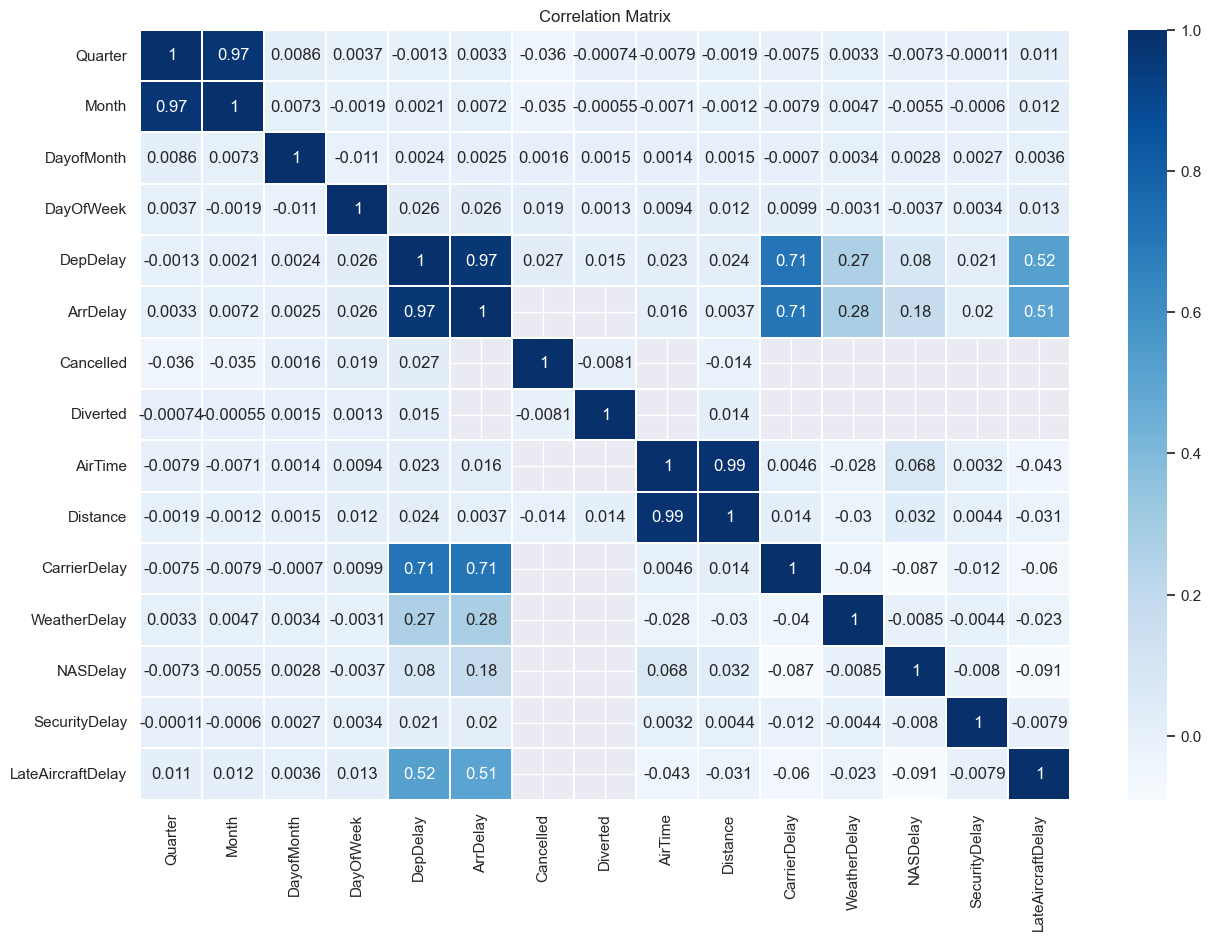

In [16]:
sns.set(rc={"figure.figsize":(15,10)})
plt.title("Correlation Matrix")
sns.heatmap(df.corr(), annot=True , linewidths = 0.2, cmap = 'Blues')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7013508 entries, 0 to 7013507
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Quarter            int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   FlightDate         object 
 5   Airlines           object 
 6   OriginCityName     object 
 7   DestCityName       object 
 8   DepDelay           float64
 9   ArrDelay           float64
 10  Cancelled          float64
 11  Diverted           float64
 12  AirTime            float64
 13  Distance           float64
 14  CarrierDelay       float64
 15  WeatherDelay       float64
 16  NASDelay           float64
 17  SecurityDelay      float64
 18  LateAircraftDelay  float64
dtypes: float64(11), int64(4), object(4)
memory usage: 1016.7+ MB


In [18]:
df['Airlines'] = df['Airlines'].astype('category')
df['OriginCityName'] = df['OriginCityName'].astype('category')
df['DestCityName'] = df['DestCityName'].astype('category')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7013508 entries, 0 to 7013507
Data columns (total 19 columns):
 #   Column             Dtype   
---  ------             -----   
 0   Quarter            int64   
 1   Month              int64   
 2   DayofMonth         int64   
 3   DayOfWeek          int64   
 4   FlightDate         object  
 5   Airlines           category
 6   OriginCityName     category
 7   DestCityName       category
 8   DepDelay           float64 
 9   ArrDelay           float64 
 10  Cancelled          float64 
 11  Diverted           float64 
 12  AirTime            float64 
 13  Distance           float64 
 14  CarrierDelay       float64 
 15  WeatherDelay       float64 
 16  NASDelay           float64 
 17  SecurityDelay      float64 
 18  LateAircraftDelay  float64 
dtypes: category(3), float64(11), int64(4), object(1)
memory usage: 889.6+ MB


## Checking duplicated values in each column in the dataset.

In [20]:
df.duplicated().sum()    # checking duplicated values

52095

In [21]:
df = df.drop_duplicates()

In [22]:
df.shape

(6961413, 19)

## Checking missing values in each column in the dataset.

In [23]:
df.isnull().sum()  # Checking null values 

Quarter                    0
Month                      0
DayofMonth                 0
DayOfWeek                  0
FlightDate                 0
Airlines                   0
OriginCityName             0
DestCityName               0
DepDelay              136573
ArrDelay              157407
Cancelled                  0
Diverted                   0
AirTime               157407
Distance                   0
CarrierDelay         5535123
WeatherDelay         5535123
NASDelay             5535123
SecurityDelay        5535123
LateAircraftDelay    5535123
dtype: int64

In [24]:
df.isnull().sum() * 100 / len(df)   # Checking percentage of  null values 

Quarter               0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
FlightDate            0.000000
Airlines              0.000000
OriginCityName        0.000000
DestCityName          0.000000
DepDelay              1.961857
ArrDelay              2.261136
Cancelled             0.000000
Diverted              0.000000
AirTime               2.261136
Distance              0.000000
CarrierDelay         79.511487
WeatherDelay         79.511487
NASDelay             79.511487
SecurityDelay        79.511487
LateAircraftDelay    79.511487
dtype: float64

In [25]:
## Dealing with missing values in each column in the dataset.

In [26]:
df.DepDelay.value_counts()

-5.0       507445
-4.0       480367
-3.0       468243
-2.0       426967
-6.0       395489
            ...  
 1597.0         1
 1681.0         1
 2994.0         1
 1622.0         1
 1584.0         1
Name: DepDelay, Length: 1766, dtype: int64

In [27]:
df.DepDelay.unique()

array([  nan,   -4.,   -2., ..., 1395., 1338., 1584.])

In [28]:
df.ArrDelay.unique()

array([       nan, -1.000e+00, -1.200e+01, ...,  1.319e+03,  1.361e+03,
        1.429e+03])

In [29]:
df.ArrDelay.value_counts()

-10.0      194587
-11.0      193787
-12.0      193033
-9.0       191504
-13.0      189798
            ...  
 1781.0         1
 1628.0         1
 1413.0         1
 1496.0         1
 1429.0         1
Name: ArrDelay, Length: 1779, dtype: int64

In [30]:
df["DepDelay"].sort_values().unique()

array([ -96.,  -93.,  -92., ..., 5995., 7223.,   nan])

In [31]:
df["ArrDelay"].sort_values().unique()

array([-100.,  -99.,  -96., ..., 5986., 7232.,   nan])

A canceled flight is not a delayed flight as it never left nor arrived to its destination for whatever reason.

In [32]:
df.Cancelled.nunique()

2

In [33]:
df.Cancelled.value_counts()

0.0    6820654
1.0     140759
Name: Cancelled, dtype: int64

This is a binary column where number 1 equals a canceled flight, and a 0 not canceled, therefore we can drop the flights that were canceled, equivalent to 140759.

In [34]:
dummy = df[(df['Cancelled'] == 1)]
print('dummy shape:', dummy.shape)
print('====================================')
print('dummy dataframe:')
dummy.head()

dummy shape: (140759, 19)
dummy dataframe:


,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,ArrDelay,Cancelled,Diverted,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,1,6,4,2022-01-06,Delta Airlines,"Fort Lauderdale, FL","New York, NY",NaN,NaN,1.0,0.0,NaN,1076.0,NaN,NaN,NaN,NaN,NaN
30,1,1,6,4,2022-01-06,Delta Airlines,"Detroit, MI","Nashville, TN",NaN,NaN,1.0,0.0,NaN,456.0,NaN,NaN,NaN,NaN,NaN
75,1,1,6,4,2022-01-06,Delta Airlines,"Cincinnati, OH","Boston, MA",NaN,NaN,1.0,0.0,NaN,752.0,NaN,NaN,NaN,NaN,NaN
148,1,1,6,4,2022-01-06,Delta Airlines,"Miami, FL","New York, NY",NaN,NaN,1.0,0.0,NaN,1096.0,NaN,NaN,NaN,NaN,NaN
157,1,1,6,4,2022-01-06,Delta Airlines,"Atlanta, GA","Nashville, TN",NaN,NaN,1.0,0.0,NaN,214.0,NaN,NaN,NaN,NaN,NaN


In [35]:
dummy.Cancelled.nunique()

1

In [36]:
dummy.Cancelled.value_counts()

1.0    140759
Name: Cancelled, dtype: int64

In [37]:
df = df[(df['Cancelled'] == 0)]
df.head(2)

,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,ArrDelay,Cancelled,Diverted,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,1,1,6,4,2022-01-06,Delta Airlines,"Atlanta, GA","Fort Lauderdale, FL",-4.0,-1.0,0.0,0.0,93.0,581.0,NaN,NaN,NaN,NaN,NaN
2,1,1,6,4,2022-01-06,Delta Airlines,"Fort Lauderdale, FL","Atlanta, GA",-2.0,-12.0,0.0,0.0,83.0,581.0,NaN,NaN,NaN,NaN,NaN


In [38]:
df = df.drop(['Cancelled'], axis = 1) 

In [39]:
df.shape

(6820654, 18)

In [40]:
df.Diverted.nunique()

2

In [41]:
df.Diverted.value_counts()

0.0    6804007
1.0      16647
Name: Diverted, dtype: int64

I will create a separate dataframe with only the columns where Diverted is 1. 

In [42]:
Diverted_1 = df['Diverted']==1

In [43]:
df_DIV = df[Diverted_1]
print(df_DIV.shape)

(16647, 18)


In [44]:
df_DIV.head(20)

,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,ArrDelay,Diverted,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
53,1,1,6,4,2022-01-06,Delta Airlines,"Atlanta, GA","Norfolk, VA",-2.0,NaN,1.0,NaN,516.0,NaN,NaN,NaN,NaN,NaN
106,1,1,6,4,2022-01-06,Delta Airlines,"Washington, DC","Seattle, WA",-1.0,NaN,1.0,NaN,2306.0,NaN,NaN,NaN,NaN,NaN
1885,1,1,7,5,2022-01-07,Delta Airlines,"Salt Lake City, UT","Kahului, HI",9.0,NaN,1.0,NaN,2935.0,NaN,NaN,NaN,NaN,NaN
3515,1,1,8,6,2022-01-08,Delta Airlines,"Atlanta, GA","Las Vegas, NV",30.0,NaN,1.0,NaN,1747.0,NaN,NaN,NaN,NaN,NaN
3808,1,1,8,6,2022-01-08,Delta Airlines,"Detroit, MI","Las Vegas, NV",-6.0,NaN,1.0,NaN,1749.0,NaN,NaN,NaN,NaN,NaN
4488,1,1,15,6,2022-01-15,Delta Airlines,"San Diego, CA","Seattle, WA",-3.0,NaN,1.0,NaN,1050.0,NaN,NaN,NaN,NaN,NaN
5655,1,1,16,7,2022-01-16,Delta Airlines,"Washington, DC","Atlanta, GA",-4.0,NaN,1.0,NaN,547.0,NaN,NaN,NaN,NaN,NaN
5778,1,1,16,7,2022-01-16,Delta Airlines,"Las Vegas, NV","New York, NY",-2.0,NaN,1.0,NaN,2248.0,NaN,NaN,NaN,NaN,NaN
5901,1,1,16,7,2022-01-16,Delta Airlines,"Atlanta, GA","Norfolk, VA",0.0,NaN,1.0,NaN,516.0,NaN,NaN,NaN,NaN,NaN
6922,1,1,16,7,2022-01-16,Delta Airlines,"Atlanta, GA","Harrisburg, PA",-4.0,NaN,1.0,NaN,620.0,NaN,NaN,NaN,NaN,NaN


In [45]:
df_DIV.ArrDelay.nunique()

0

In [46]:
df_DIV.ArrDelay.unique()

array([nan])

In [47]:
df_DIV.AirTime.nunique()

0

In [48]:
df = df.drop(['Diverted'], axis=1)
df.head(3)

,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,ArrDelay,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,1,1,6,4,2022-01-06,Delta Airlines,"Atlanta, GA","Fort Lauderdale, FL",-4.0,-1.0,93.0,581.0,NaN,NaN,NaN,NaN,NaN
2,1,1,6,4,2022-01-06,Delta Airlines,"Fort Lauderdale, FL","Atlanta, GA",-2.0,-12.0,83.0,581.0,NaN,NaN,NaN,NaN,NaN
3,1,1,6,4,2022-01-06,Delta Airlines,"Fort Lauderdale, FL","Raleigh/Durham, NC",-5.0,-15.0,93.0,680.0,NaN,NaN,NaN,NaN,NaN


In [49]:
df.shape

(6820654, 17)

In [50]:
print(df.CarrierDelay.isna().sum())
print(df.WeatherDelay.isna().sum())
print(df.NASDelay.isna().sum())
print(df.SecurityDelay.isna().sum())
print(df.LateAircraftDelay.isna().sum())

5394364
5394364
5394364
5394364
5394364


In [51]:
print("Percentage of valid data:", 100 - (df.CarrierDelay.isna().sum()*100/len(df)))
print("Percentage of missing values:", (df.CarrierDelay.isna().sum()*100/len(df)))

Percentage of valid data: 20.91133782772151
Percentage of missing values: 79.08866217227849


In [52]:
df = df.drop(['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis=1)
print('The current shape of df1 is:', df.shape)
df.head()

The current shape of df1 is: (6820654, 12)


,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,ArrDelay,AirTime,Distance
1,1,1,6,4,2022-01-06,Delta Airlines,"Atlanta, GA","Fort Lauderdale, FL",-4.0,-1.0,93.0,581.0
2,1,1,6,4,2022-01-06,Delta Airlines,"Fort Lauderdale, FL","Atlanta, GA",-2.0,-12.0,83.0,581.0
3,1,1,6,4,2022-01-06,Delta Airlines,"Fort Lauderdale, FL","Raleigh/Durham, NC",-5.0,-15.0,93.0,680.0
4,1,1,6,4,2022-01-06,Delta Airlines,"Atlanta, GA","Jackson/Vicksburg, MS",-4.0,-11.0,60.0,341.0
5,1,1,6,4,2022-01-06,Delta Airlines,"Jackson/Vicksburg, MS","Atlanta, GA",-7.0,-23.0,49.0,341.0


In [53]:
df.isna().sum()

Quarter               0
Month                 0
DayofMonth            0
DayOfWeek             0
FlightDate            0
Airlines              0
OriginCityName        0
DestCityName          0
DepDelay              0
ArrDelay          16648
AirTime           16648
Distance              0
dtype: int64

In [54]:
print('Number of total missing values:', df.isna().sum().sum())
print('df shape:', df.shape)

Number of total missing values: 33296
df shape: (6820654, 12)


In [55]:
df_NaN = df.loc[df.isnull().any(axis=1)]
df_NaN.head(20)

,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,ArrDelay,AirTime,Distance
53,1,1,6,4,2022-01-06,Delta Airlines,"Atlanta, GA","Norfolk, VA",-2.0,NaN,NaN,516.0
106,1,1,6,4,2022-01-06,Delta Airlines,"Washington, DC","Seattle, WA",-1.0,NaN,NaN,2306.0
1885,1,1,7,5,2022-01-07,Delta Airlines,"Salt Lake City, UT","Kahului, HI",9.0,NaN,NaN,2935.0
3515,1,1,8,6,2022-01-08,Delta Airlines,"Atlanta, GA","Las Vegas, NV",30.0,NaN,NaN,1747.0
3808,1,1,8,6,2022-01-08,Delta Airlines,"Detroit, MI","Las Vegas, NV",-6.0,NaN,NaN,1749.0
4488,1,1,15,6,2022-01-15,Delta Airlines,"San Diego, CA","Seattle, WA",-3.0,NaN,NaN,1050.0
5655,1,1,16,7,2022-01-16,Delta Airlines,"Washington, DC","Atlanta, GA",-4.0,NaN,NaN,547.0
5778,1,1,16,7,2022-01-16,Delta Airlines,"Las Vegas, NV","New York, NY",-2.0,NaN,NaN,2248.0
5901,1,1,16,7,2022-01-16,Delta Airlines,"Atlanta, GA","Norfolk, VA",0.0,NaN,NaN,516.0
6922,1,1,16,7,2022-01-16,Delta Airlines,"Atlanta, GA","Harrisburg, PA",-4.0,NaN,NaN,620.0


In [56]:
df_NaN.shape

(16648, 12)

In [57]:
percentage_NaN = (len(df_NaN)*100)/len(df)
print('Percentage of rows with at least 1 NaN value:', percentage_NaN)

Percentage of rows with at least 1 NaN value: 0.24408216572780264


In [58]:
df = df.dropna()

In [59]:
df.shape

(6804006, 12)

In [60]:
df.isna().sum()

Quarter           0
Month             0
DayofMonth        0
DayOfWeek         0
FlightDate        0
Airlines          0
OriginCityName    0
DestCityName      0
DepDelay          0
ArrDelay          0
AirTime           0
Distance          0
dtype: int64

In [61]:
df.head(2)

,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,ArrDelay,AirTime,Distance
1,1,1,6,4,2022-01-06,Delta Airlines,"Atlanta, GA","Fort Lauderdale, FL",-4.0,-1.0,93.0,581.0
2,1,1,6,4,2022-01-06,Delta Airlines,"Fort Lauderdale, FL","Atlanta, GA",-2.0,-12.0,83.0,581.0


In [62]:
print('Maximum number of days in a month:', df.DayofMonth.nunique())
print('Total number of months:', df.Month.nunique())
print('Total number of day of Week:', df.DayOfWeek.nunique())

Maximum number of days in a month: 31
Total number of months: 12
Total number of day of Week: 7


In [63]:
import calendar
df['Month_Str'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [64]:
df.head(3)

,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,ArrDelay,AirTime,Distance,Month_Str
1,1,1,6,4,2022-01-06,Delta Airlines,"Atlanta, GA","Fort Lauderdale, FL",-4.0,-1.0,93.0,581.0,Jan
2,1,1,6,4,2022-01-06,Delta Airlines,"Fort Lauderdale, FL","Atlanta, GA",-2.0,-12.0,83.0,581.0,Jan
3,1,1,6,4,2022-01-06,Delta Airlines,"Fort Lauderdale, FL","Raleigh/Durham, NC",-5.0,-15.0,93.0,680.0,Jan


In [65]:
print('Months present in dataframe:', df.Month.unique())
print('Months present in dataframe:', df.Month_Str.unique())

Months present in dataframe: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Months present in dataframe: ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']


In [66]:
status = []

for value in df['DayOfWeek']:
    if value == 1:
        status.append("Mon")
    if value == 2:
        status.append("Tue") 
    if value == 3:
        status.append("Wed") 
    if value == 4:
        status.append("Thu") 
    if value == 5:
        status.append("Fri") 
    if value == 6:
        status.append("Sat") 
    if value == 7:
        status.append("Sun")
   
df['DayOfWeek_Str'] = status
df.head()    

,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,ArrDelay,AirTime,Distance,Month_Str,DayOfWeek_Str
1,1,1,6,4,2022-01-06,Delta Airlines,"Atlanta, GA","Fort Lauderdale, FL",-4.0,-1.0,93.0,581.0,Jan,Thu
2,1,1,6,4,2022-01-06,Delta Airlines,"Fort Lauderdale, FL","Atlanta, GA",-2.0,-12.0,83.0,581.0,Jan,Thu
3,1,1,6,4,2022-01-06,Delta Airlines,"Fort Lauderdale, FL","Raleigh/Durham, NC",-5.0,-15.0,93.0,680.0,Jan,Thu
4,1,1,6,4,2022-01-06,Delta Airlines,"Atlanta, GA","Jackson/Vicksburg, MS",-4.0,-11.0,60.0,341.0,Jan,Thu
5,1,1,6,4,2022-01-06,Delta Airlines,"Jackson/Vicksburg, MS","Atlanta, GA",-7.0,-23.0,49.0,341.0,Jan,Thu


In [67]:
df.DayOfWeek_Str.value_counts()

Mon    1010240
Fri    1005797
Thu     998625
Sun     987749
Wed     960791
Tue     954821
Sat     885983
Name: DayOfWeek_Str, dtype: int64

In [68]:
df["ArrDelay"].sort_values().unique()

array([-100.,  -99.,  -96., ..., 5324., 5986., 7232.])

The Federal Aviation Administration(FAA) considers a flight to be delayed when it is 15minutes later than its scheduled time. This is a binary classification (Delay or Either Earlier or On Time). 1 represents delayed flights.

In [69]:
status = []

for value in df["ArrDelay"]:
    if value >15:
        status.append(1)
    else:
        status.append(0)
        
df["Flight_Status"] = status
df.head()    

,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,ArrDelay,AirTime,Distance,Month_Str,DayOfWeek_Str,Flight_Status
1,1,1,6,4,2022-01-06,Delta Airlines,"Atlanta, GA","Fort Lauderdale, FL",-4.0,-1.0,93.0,581.0,Jan,Thu,0
2,1,1,6,4,2022-01-06,Delta Airlines,"Fort Lauderdale, FL","Atlanta, GA",-2.0,-12.0,83.0,581.0,Jan,Thu,0
3,1,1,6,4,2022-01-06,Delta Airlines,"Fort Lauderdale, FL","Raleigh/Durham, NC",-5.0,-15.0,93.0,680.0,Jan,Thu,0
4,1,1,6,4,2022-01-06,Delta Airlines,"Atlanta, GA","Jackson/Vicksburg, MS",-4.0,-11.0,60.0,341.0,Jan,Thu,0
5,1,1,6,4,2022-01-06,Delta Airlines,"Jackson/Vicksburg, MS","Atlanta, GA",-7.0,-23.0,49.0,341.0,Jan,Thu,0


In [70]:
df.Flight_Status.value_counts(normalize=True)

0    0.797357
1    0.202643
Name: Flight_Status, dtype: float64

This means that 79,7% of the flights have no delays, but that can be that they arrived either early or on time, and 20,3% of the flight were delayed. 

In [71]:
df.isna().sum()

Quarter           0
Month             0
DayofMonth        0
DayOfWeek         0
FlightDate        0
Airlines          0
OriginCityName    0
DestCityName      0
DepDelay          0
ArrDelay          0
AirTime           0
Distance          0
Month_Str         0
DayOfWeek_Str     0
Flight_Status     0
dtype: int64

In [72]:
df.shape

(6804006, 15)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6804006 entries, 1 to 7013507
Data columns (total 15 columns):
 #   Column          Dtype   
---  ------          -----   
 0   Quarter         int64   
 1   Month           int64   
 2   DayofMonth      int64   
 3   DayOfWeek       int64   
 4   FlightDate      object  
 5   Airlines        category
 6   OriginCityName  category
 7   DestCityName    category
 8   DepDelay        float64 
 9   ArrDelay        float64 
 10  AirTime         float64 
 11  Distance        float64 
 12  Month_Str       object  
 13  DayOfWeek_Str   object  
 14  Flight_Status   int64   
dtypes: category(3), float64(4), int64(5), object(3)
memory usage: 707.3+ MB


C:\Users\asus3\AppData\Local\Temp\ipykernel_12228\3467595808.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True , linewidths = 0.2, cmap = 'Blues')


<Axes: title={'center': 'Correlation Matrix'}>

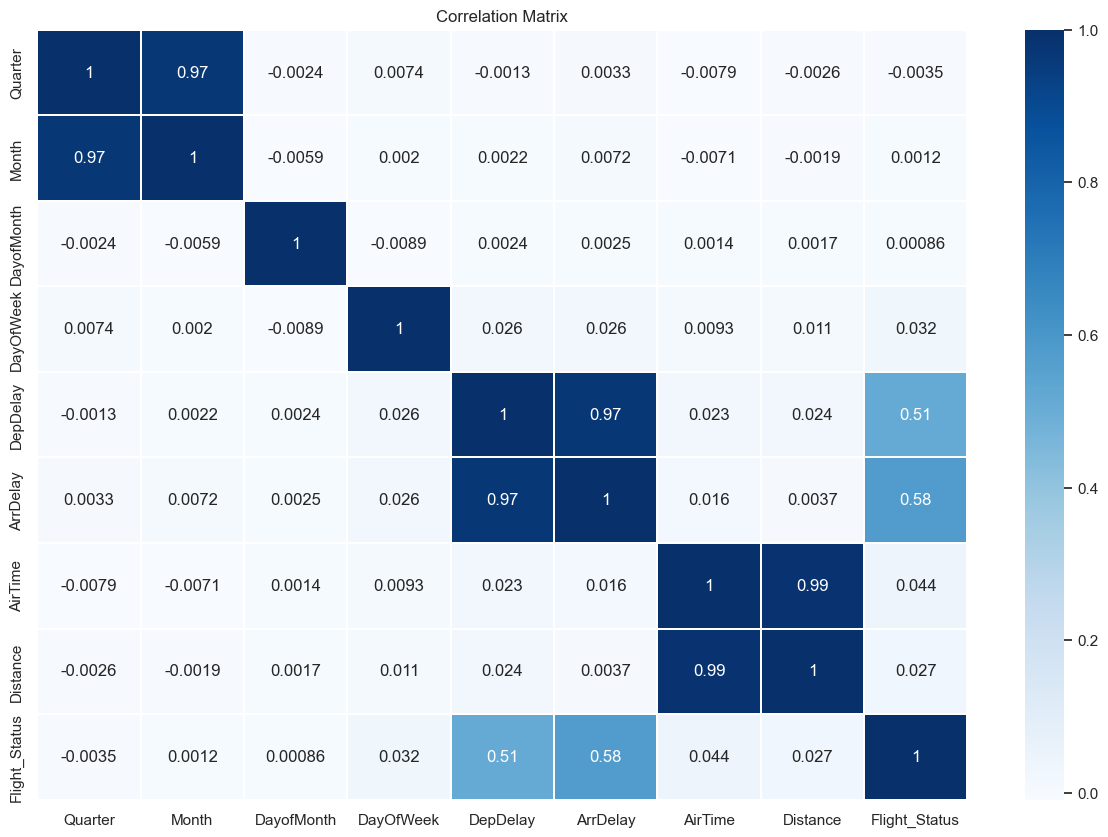

In [74]:
sns.set(rc={"figure.figsize":(15,10)})
plt.title("Correlation Matrix")
sns.heatmap(df.corr(), annot=True , linewidths = 0.2, cmap = 'Blues')

In [75]:
df.to_csv('df_EDA.csv')